## Plotting routes on world map

- The visual representation of the routes will give understanding of the geography of airline business

In [2]:
from mpl_toolkits.basemap import Basemap
m = Basemap(resolution='c',
            projection='kav7',
            lat_0=0., # Center around
            lon_0=0.) # lat 0, lon 0

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.plotly as py
%matplotlib inline

In [4]:
raw_data = '../Data/raw_data/'
uniqueroutes = pd.read_csv(raw_data +'UniqueRoutesData.csv' , low_memory=False)

In [5]:
international_routes = uniqueroutes[uniqueroutes['Country_start'] != uniqueroutes['Country_end']].reset_index(drop=True)
international_routes = international_routes.dropna(subset=['Tz_DB_start'])
europe_routes = international_routes[international_routes.Tz_DB_start.str.startswith('Europe/')].reset_index(drop=True)
europe_routes = europe_routes[europe_routes.Tz_DB_end.str.startswith('Europe/')].reset_index(drop=True)

domestic_routes = uniqueroutes[uniqueroutes['Country_start'] == uniqueroutes['Country_end']].reset_index(drop=True)
domestic_US = domestic_routes[domestic_routes['Country_start'] == 'United States'].reset_index(drop=True)

/Users/sumitdeshmukh/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/sumitdeshmukh/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/Users/sumitdeshmukh/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()


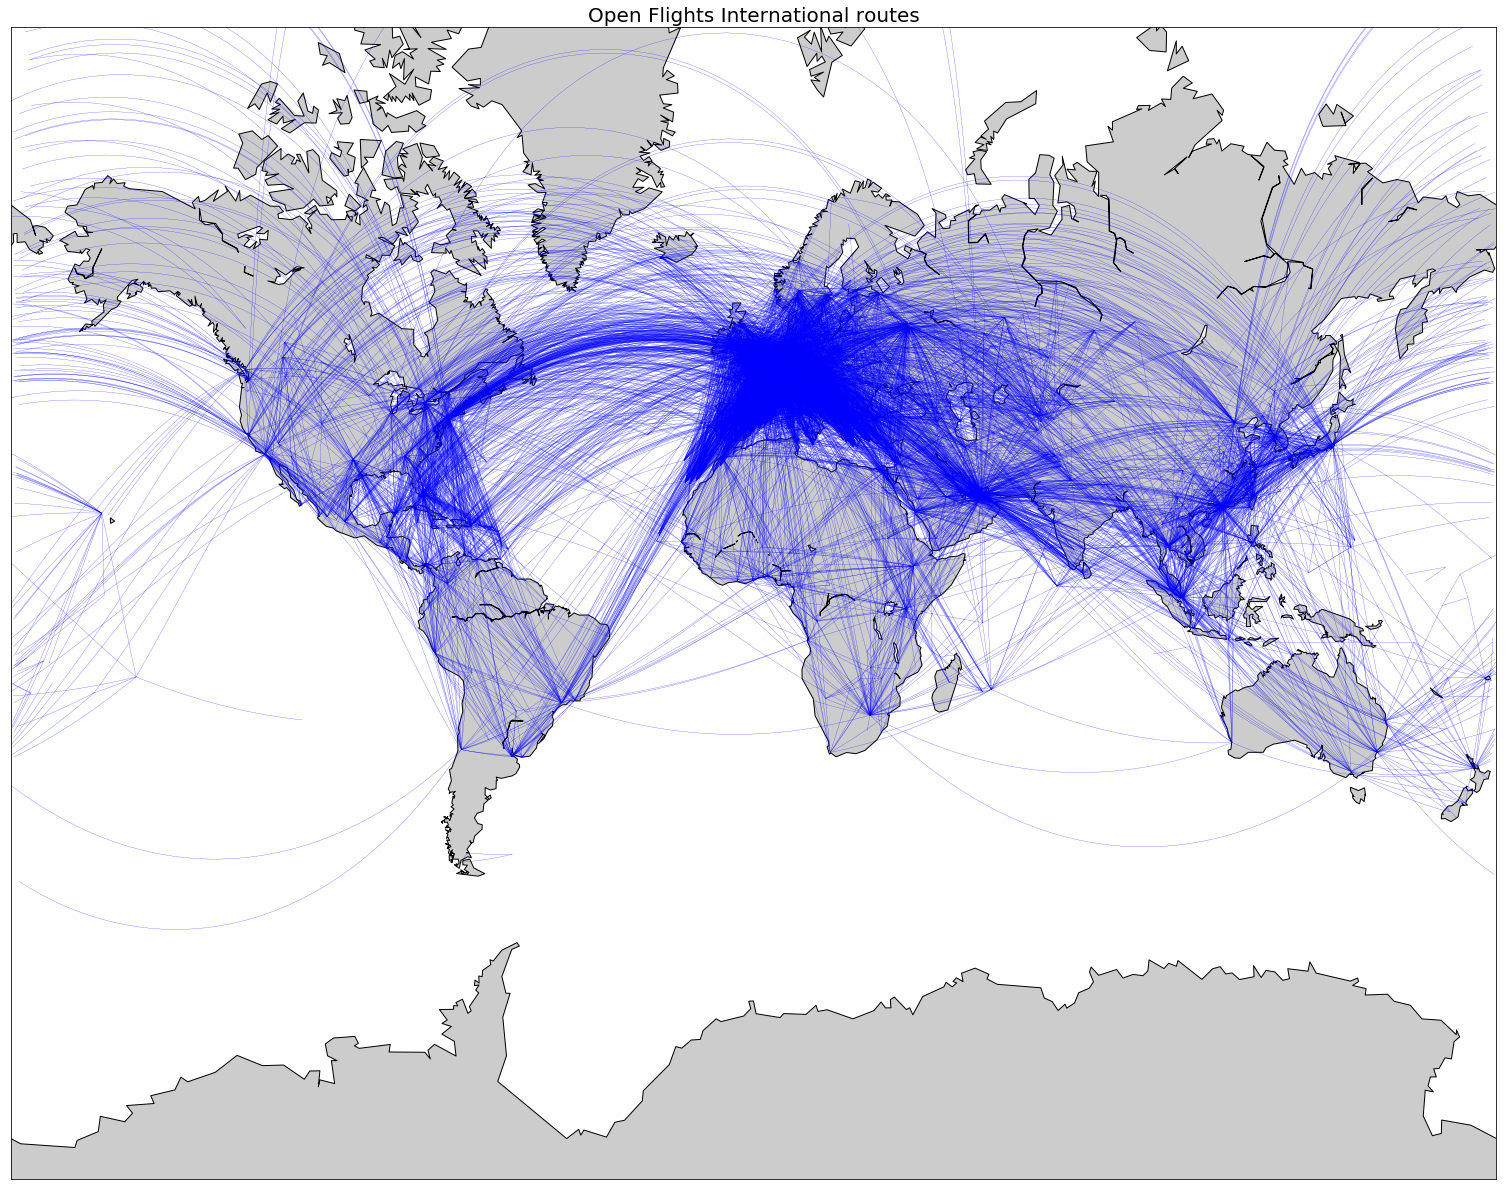

In [5]:
# create new figure, axes instances.
fig=plt.figure(figsize=(27, 20))
ax=fig.add_axes([0.1,0.1,0.8,0.8])
# setup mercator map projection.
m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,\
            llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
    
for i, route in international_routes.iterrows():
    line, = m.drawgreatcircle(route['Longitude_start'],route['Latitude_start'],route['Longitude_end'],
                      route['Latitude_end'],linewidth=0.1,color='b')
    
    path = line.get_path()
    cut_point, = np.where(np.abs(np.diff(path.vertices[:, 0])) > 30000e3)
    if len(cut_point) > 0:
        cut_point = cut_point[0]
        vertices = np.concatenate([path.vertices[:cut_point, :],
                                  [[np.nan, np.nan]],
                                  path.vertices[cut_point+1:, :]])
        path.codes = None  # treat vertices as a serie of line segments
        path.vertices = vertices
    
m.drawcoastlines()
m.fillcontinents()
# draw parallels
#m.drawparallels(np.arange(10,90,20),labels=[1,1,0,1])
# draw meridians
#m.drawmeridians(np.arange(-180,180,30),labels=[1,1,0,1])
ax.set_title('Open Flights International routes', fontsize=20)
plt.show()
#plt.savefig('Output/images/worldmap.png', format='png', bbox_inches='tight')
plt.close()

/Users/sumitdeshmukh/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning:

The ishold function was deprecated in version 2.0.

/Users/sumitdeshmukh/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning:

axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.

/Users/sumitdeshmukh/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning:

The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.



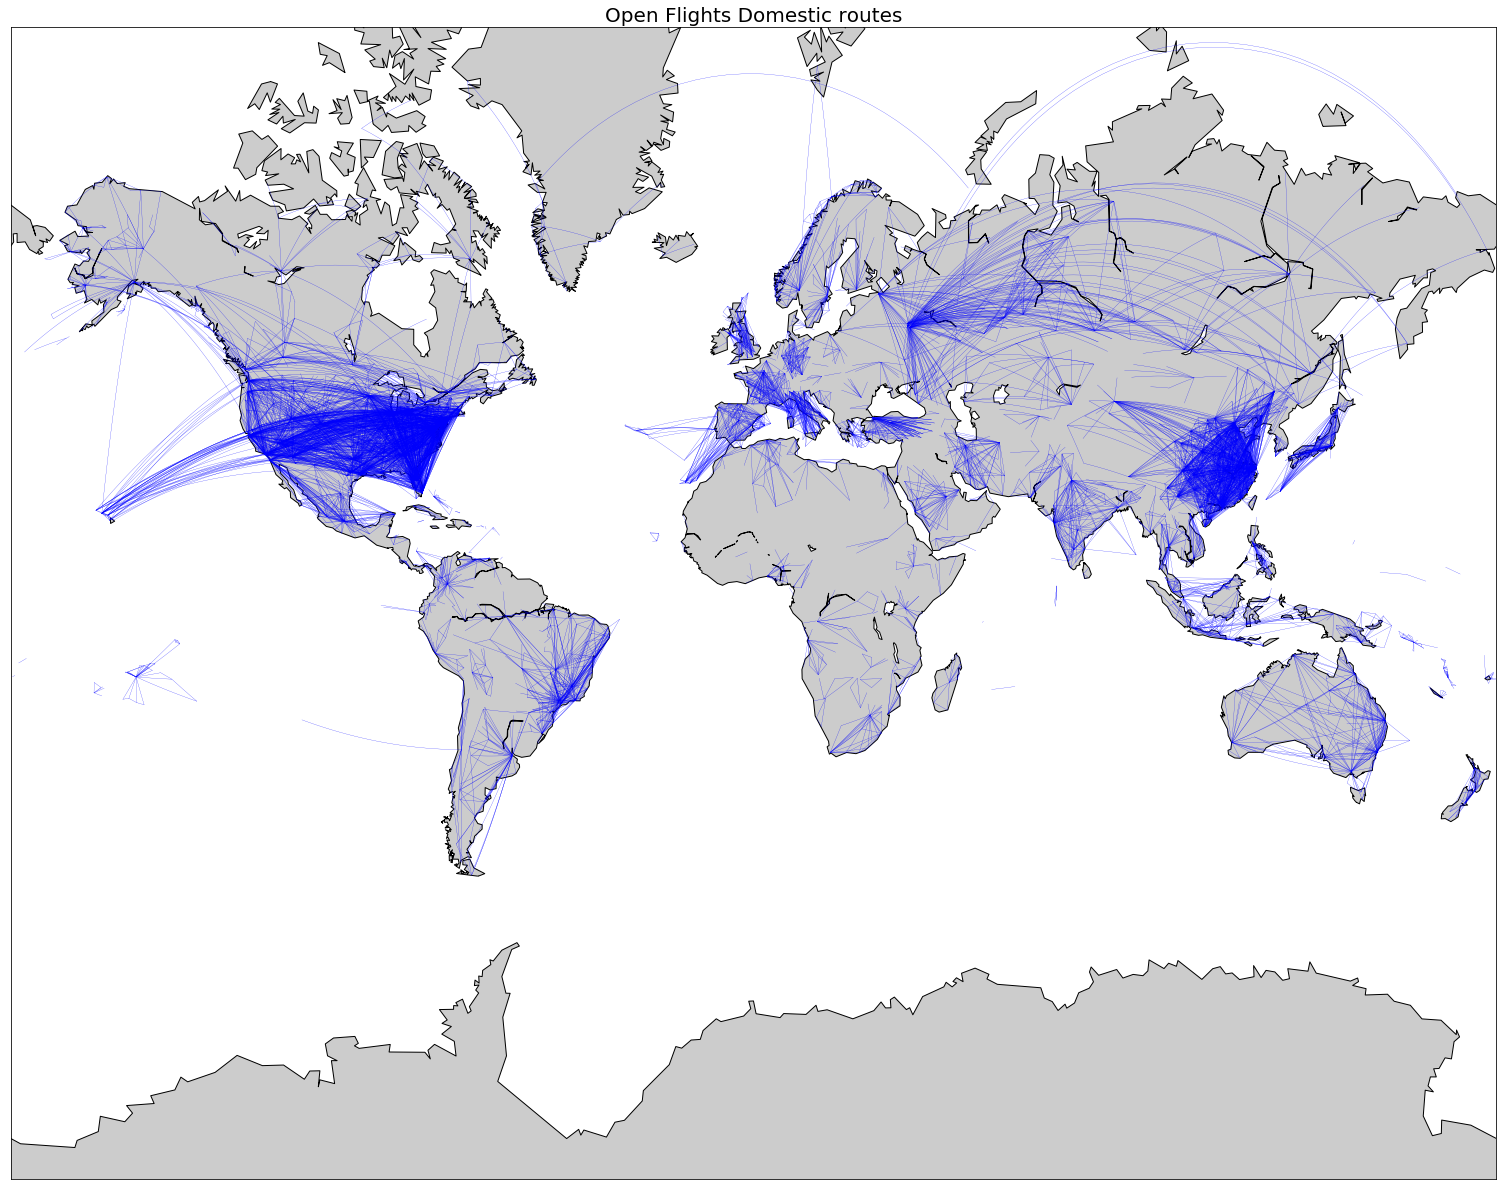

In [20]:
# create new figure, axes instances.
fig=plt.figure(figsize=(27, 20))
ax=fig.add_axes([0.1,0.1,0.8,0.8])
# setup mercator map projection.
m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,\
            llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
    
for i, route in domestic_routes.iterrows():
    line, = m.drawgreatcircle(route['Longitude_start'],route['Latitude_start'],route['Longitude_end'],
                      route['Latitude_end'],linewidth=0.2,color='b')
    
    path = line.get_path()
    cut_point, = np.where(np.abs(np.diff(path.vertices[:, 0])) > 30000e3)
    if len(cut_point) > 0:
        cut_point = cut_point[0]
        vertices = np.concatenate([path.vertices[:cut_point, :],
                                  [[np.nan, np.nan]],
                                  path.vertices[cut_point+1:, :]])
        path.codes = None  # treat vertices as a serie of line segments
        path.vertices = vertices
    
m.drawcoastlines()
m.fillcontinents()
# draw parallels
#m.drawparallels(np.arange(10,90,20),labels=[1,1,0,1])
# draw meridians
#m.drawmeridians(np.arange(-180,180,30),labels=[1,1,0,1])
ax.set_title('Open Flights Domestic routes', fontsize=20)
plt.show()
#plt.savefig('Output/images/worldmap.png', format='png', bbox_inches='tight')
plt.close()

/Users/sumitdeshmukh/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning:

The ishold function was deprecated in version 2.0.

/Users/sumitdeshmukh/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning:

axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.

/Users/sumitdeshmukh/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning:

The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.



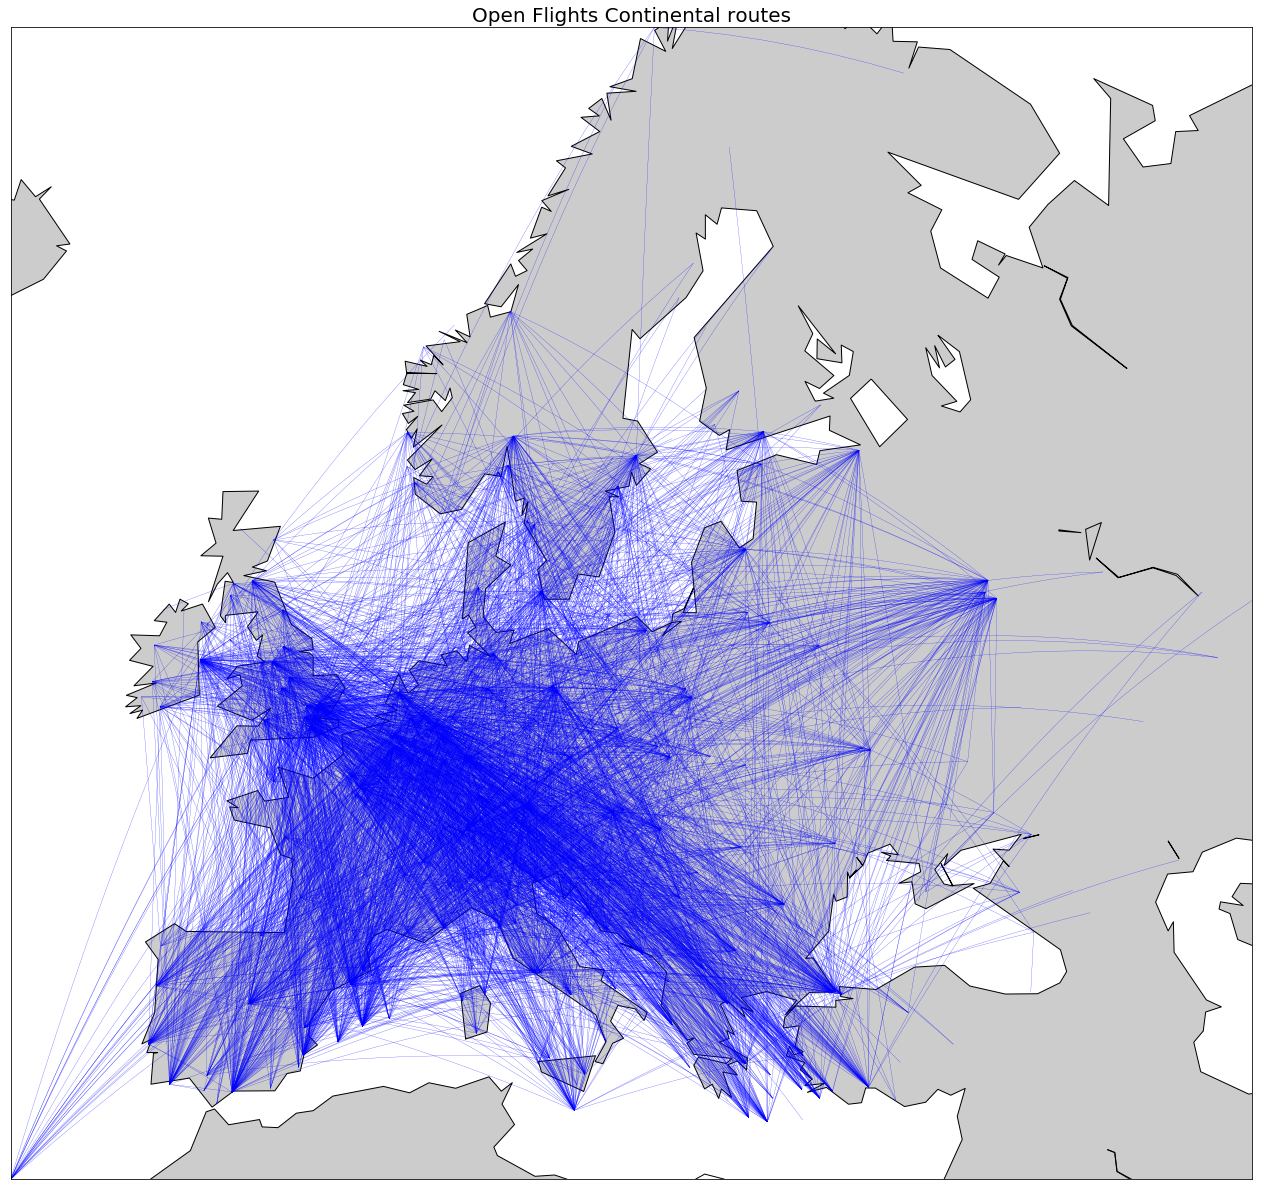

In [39]:
# create new figure, axes instances.
fig=plt.figure(figsize=(27, 20))
ax=fig.add_axes([0.1,0.1,0.8,0.8])
# setup mercator map projection.
m = Basemap(projection='merc',llcrnrlat=europe_routes['Latitude_start'].min(),
            urcrnrlat=europe_routes['Latitude_end'].max(),
            llcrnrlon=europe_routes['Longitude_start'].min(),
            urcrnrlon=europe_routes['Longitude_end'].max(),
            lat_ts=20,
            resolution='c')
    
for i, route in europe_routes.iterrows():
    line, = m.drawgreatcircle(route['Longitude_start'],route['Latitude_start'],route['Longitude_end'],
                      route['Latitude_end'],linewidth=0.1,color='b')
    
    path = line.get_path()
    cut_point, = np.where(np.abs(np.diff(path.vertices[:, 0])) > 30000e3)
    if len(cut_point) > 0:
        cut_point = cut_point[0]
        vertices = np.concatenate([path.vertices[:cut_point, :],
                                  [[np.nan, np.nan]],
                                  path.vertices[cut_point+1:, :]])
        path.codes = None  # treat vertices as a serie of line segments
        path.vertices = vertices
    
m.drawcoastlines()
m.fillcontinents()
# draw parallels
#m.drawparallels(np.arange(10,90,20),labels=[1,1,0,1])
# draw meridians
#m.drawmeridians(np.arange(-180,180,30),labels=[1,1,0,1])
ax.set_title('Open Flights Europian routes', fontsize=20)
plt.show()
#plt.savefig('Output/images/worldmap.png', format='png', bbox_inches='tight')
plt.close()

In [8]:
europe_routes = europe_routes.sample(n=2000).reset_index(drop=True)
airports = [ dict(
        type = 'scattergeo',
        locationmode = 'country names',
        lon = europe_routes['Longitude_start'],
        lat = europe_routes['Latitude_start'],
        hoverinfo = 'text',
        text = europe_routes['Airport_start'],
        mode = 'markers',
        marker = dict( 
            size=2, 
            color='rgb(255, 0, 0)',
            line = dict(
                width=3,
                color='rgba(68, 68, 68, 0)'
            )
        ))]
        
flight_paths = []
for i in range( len( europe_routes )):
    flight_paths.append(
        dict(
            type = 'scattergeo',
            locationmode = 'country names',
            lon = [ europe_routes['Longitude_start'][i], europe_routes['Longitude_end'][i] ],
            lat = [ europe_routes['Latitude_start'][i], europe_routes['Latitude_end'][i] ],
            mode = 'lines',
            line = dict(
                width = 0.1,
                color = 'blue',
            ),
            opacity = 0.6,
        )
    )
    
layout = dict(
        title = 'Europe flight routes<br>(Hover for airport names)',
        showlegend = False, 
        geo = dict(
            scope='europe',
            projection=dict( type='equirectangular' ),
            showland = True,
            landcolor = 'rgb(243, 243, 243)',
            countrycolor = 'rgb(204, 204, 204)',
            resolution = 110
        ),
    )
    
fig = dict( data= flight_paths + airports, layout=layout )
py.iplot( fig, filename='d3-flight-paths' )

In [7]:
domestic_US = domestic_US.sample(n=2000).reset_index(drop=True)
airports = [ dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = domestic_US['Longitude_start'],
        lat = domestic_US['Latitude_start'],
        hoverinfo = 'text',
        text = domestic_US['Airport_start'],
        mode = 'markers',
        marker = dict( 
            size=2, 
            color='rgb(255, 0, 0)',
            line = dict(
                width=3,
                color='rgba(68, 68, 68, 0)'
            )
        ))]
        
flight_paths = []
for i in range( len( domestic_US )):
    flight_paths.append(
        dict(
            type = 'scattergeo',
            locationmode = 'USA-states',
            lon = [ domestic_US['Longitude_start'][i], domestic_US['Longitude_end'][i] ],
            lat = [ domestic_US['Latitude_start'][i], domestic_US['Latitude_end'][i] ],
            mode = 'lines',
            line = dict(
                width = 0.1,
                color = 'blue',
            ),
            opacity = 0.6,
        )
    )
    
layout = dict(
        title = 'United States Domestic flight routes<br>(Hover for airport names)',
        showlegend = False, 
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = 'rgb(243, 243, 243)',
            countrycolor = 'rgb(204, 204, 204)',
        ),
    )
    
fig = dict( data= flight_paths + airports, layout=layout )
py.iplot( fig, filename='d3-flight-paths' )